<a href="https://colab.research.google.com/github/MaercioMamedes/analise_dados_BBDC4.SA/blob/main/desafio_pratico_mod_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp: Analista de Dados com ênfase para Mercado Financeiro
## Desafio Prático - Módulo 1: Fundamentos de Programação para Ciência de Dados

#### **Biblioteca Numpy:**
1. <span style="color: red;"> **[X]**</span> Importar o conjunto de dados em um array Numpy.
2. **[X]** Calcular estatísticas descritivas básicas para os preços das ações (mínima máxima, média, mediana e desvio padrão). Obs.: Utilizar o preço de fechamento (Close), o mais recomendado para estes tipos de análises.
3. **[X]** Identificar e tratar possíveis valores ausentes ou discrepantes no
conjunto de dados.


#### **Biblioteca Pandas:**
1. **[X]** Criar uma coluna que represente a variação percentual diária no preço das
ações.
2. **[X]** Agrupar e sumarizar os dados por mês, calculando a média e a mediana
das variações percentuais.
3. **[X]** Exibir a média e a mediana da variação percentual mensal.

#####           * **Biblioteca Matplotlib**
1. **[X]** Plotar um gráfico de linha para visualizar a evolução do preço das ações
ao longo do tempo.
2. **[X]** Criar um gráfico de barras para mostrar o volume de negociações por mês.
3. **[X]** Utilizar gráficos de dispersão para identificar possíveis correlações entre
diferentes variáveis, como preço e volume.

#### **Biblioteca Scikit-learn:**
##### 1º Modelo: Regressão (Previsão Preço)

1. Dividir o conjunto de dados em conjuntos de treinamento e teste.
2. Implementar um modelo de regressão para prever o preço das ações no
próximo mês.
3. Avaliar o desempenho do modelo usando métricas como MSE (Mean
Squared Error) e R2.
4. Plotar o resultado (Real x Previsto).

##### 2º Modelo: Classificação (Previsão Movimento do ativo)
Definindo o problema: vamos tentar prever se o preço das ações subirá
ou descerá no dia seguinte com base nas informações dos dias anteriores.

1. Criar um rótulo binário: 1 se o preço subiu e 0 se o preço desceu.
2. Usar características como preços e volumes anteriores.
3. Dividir o conjunto de dados em treinamento e teste.
4. Treinar um modelo de classificação.
5. Avaliar o modelo no conjunto de testes.
6. Visualizar os resultados.



In [2]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import yfinance as yf
import datetime

### Apresentação dos Dados Iniciais

In [3]:
# baixando dados

bbdc4 = yf.download("BBDC4.SA", start="2008-01-01", end="2023-01-01", period="1d", auto_adjust=True)
bbdc4

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BBDC4.SA,BBDC4.SA,BBDC4.SA,BBDC4.SA,BBDC4.SA
Date,,,,,
2008-01-02,11.132381,11.943154,11.111376,11.892744,0
2008-01-03,10.905753,11.279713,10.861634,11.176769,0
2008-01-04,10.777597,11.103237,10.683057,11.008697,5694095
2008-01-07,10.977181,11.115840,10.823816,10.830119,0
2008-01-08,11.145256,11.384758,11.084330,11.176769,0
...,...,...,...,...,...
2022-12-23,12.793000,12.911297,12.598654,12.632454,21104200
2022-12-26,12.488808,12.784551,12.455009,12.750752,13937200


### Estatística Descritiva dos Valores de Fechamento do Ativo

In [4]:
# transformando as datas numa coluna
bbdc4.reset_index(inplace=True)

In [5]:
bbdc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            3722 non-null   datetime64[ns]
 1   (Close, BBDC4.SA)   3722 non-null   float64       
 2   (High, BBDC4.SA)    3722 non-null   float64       
 3   (Low, BBDC4.SA)     3722 non-null   float64       
 4   (Open, BBDC4.SA)    3722 non-null   float64       
 5   (Volume, BBDC4.SA)  3722 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 174.6 KB


In [6]:
bbdc4.isna().sum()

,,0
Price,Ticker,
Date,,0
Close,BBDC4.SA,0
High,BBDC4.SA,0
Low,BBDC4.SA,0
Open,BBDC4.SA,0
Volume,BBDC4.SA,0


In [7]:
array_bbdc4 = np.array(bbdc4)

In [8]:
# Calculando a mínima, máxima, média, mediana e desvio padrão da segunda coluna (index 1)

minimo = np.min(array_bbdc4[:, 1])
maximo = np.max(array_bbdc4[:, 1])
media = np.mean(array_bbdc4[:, 1])
mediana = np.median(array_bbdc4[:, 1])
desvio_padrao = np.std(array_bbdc4[:, 1])

print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")


Mínimo: 4.776220321655273
Máximo: 21.690441131591797
Média: 10.475816895409594
Mediana: 8.808948516845703
Desvio Padrão: 4.524632688293724


#### Identificando Distorções nos dados Coletados

In [9]:
# Transformando os valores de datas num array de uma coluna

data = array_bbdc4[:, 0]
data

array([Timestamp('2008-01-02 00:00:00'), Timestamp('2008-01-03 00:00:00'),
       Timestamp('2008-01-04 00:00:00'), ...,
       Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'),
       Timestamp('2022-12-29 00:00:00')], dtype=object)

In [10]:
# transformando os valores de fechamento num array de uma coluna

fechamento = array_bbdc4[:, 1]
fechamento

array([11.132381439208984, 10.905753135681152, 10.777597427368164, ...,
       12.429659843444824, 12.809897422790527, 12.8014497756958],
      dtype=object)

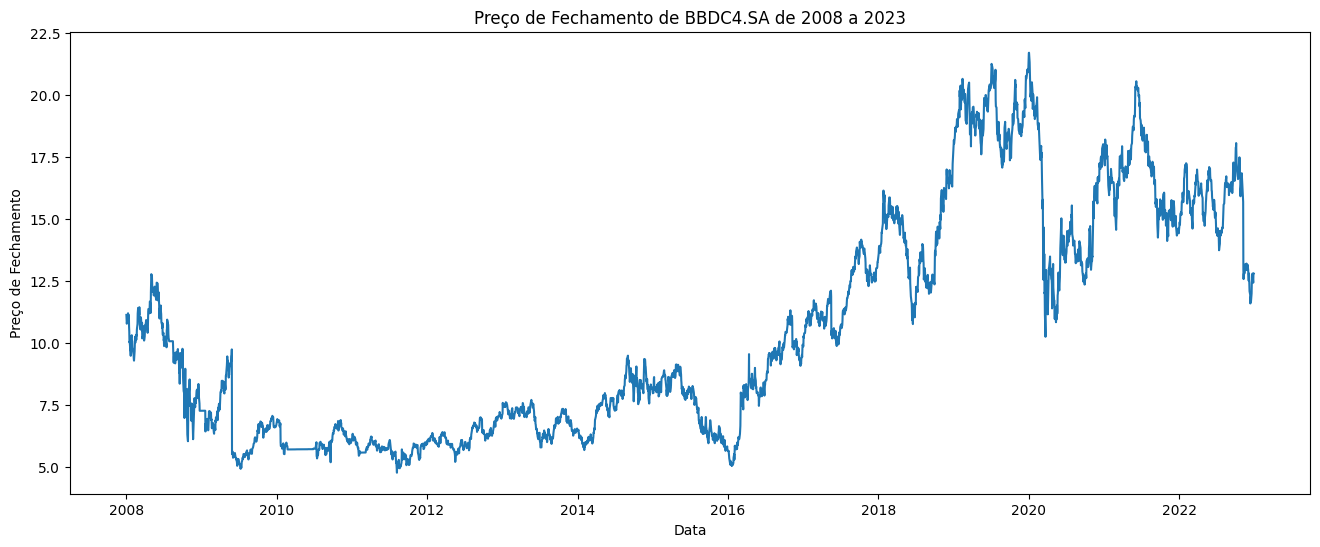

In [11]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=data, y=fechamento)
plt.title('Preço de Fechamento de BBDC4.SA de 2008 a 2023')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();

Ao analisar todo período estudado, percebe uma inconsistência no valores de fechamento do papel entre os anos de 2010 e 2011, pois percebe-se uma estabilidade de preço anormal. Valores constante por um intervalo de tempo realativamente grande

#### Localizando distorção de valores em datas entre 2010 e 2011

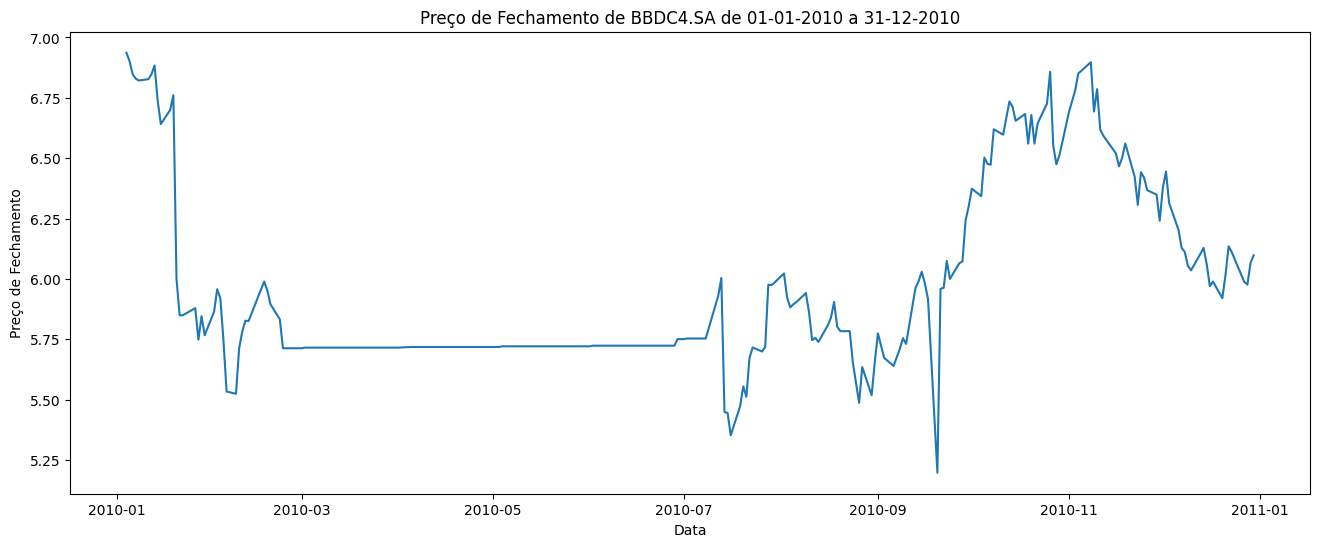

In [12]:
# selecionando um período de 01-01-2010 a 31-12-2010

index_1y = np.where((data >= pd.Timestamp('2010-01-01')) & (data <= pd.Timestamp('2010-12-31')))
data_1y = data[index_1y]
fechamento_1y = fechamento[index_1y]

plt.figure(figsize=(16, 6))
sns.lineplot(x=data_1y, y=fechamento_1y)
plt.title('Preço de Fechamento de BBDC4.SA de 01-01-2010 a 31-12-2010')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();

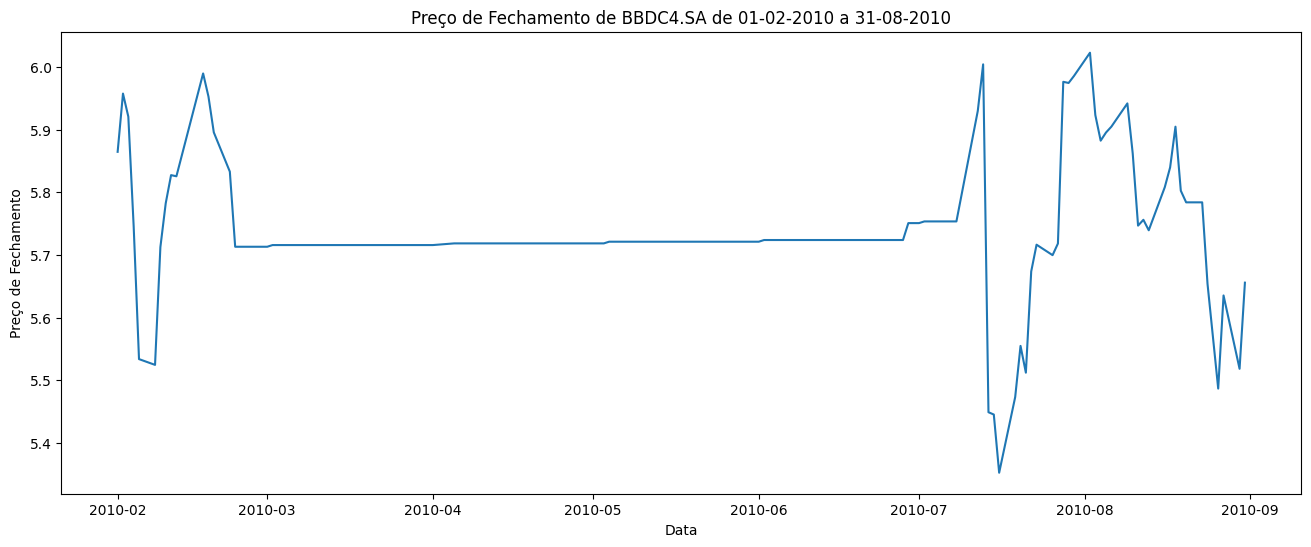

In [13]:
# selecionando um período de 01-02-2010 a 31-08-2010

index_1y = np.where((data >= pd.Timestamp('2010-02-01')) & (data <= pd.Timestamp('2010-08-31')))
data_1y = data[index_1y]
fechamento_1y = fechamento[index_1y]

plt.figure(figsize=(16, 6))
sns.lineplot(x=data_1y, y=fechamento_1y)
plt.title('Preço de Fechamento de BBDC4.SA de 01-02-2010 a 31-08-2010')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();

In [14]:
# identificando valores que se repetem dentro do intervalo analisado

pd.Series(fechamento_1y).value_counts()

,count
5.715851,23
5.721216,21
5.718534,20
5.723901,18
5.753576,5
5.713168,5
5.750876,3
5.784006,2
5.904699,2
5.985574,1


In [15]:
# encontrando os valores que se repetem com numpy

def encontrar_valores_repetidos(arr):
  values, counts = np.unique(arr, return_counts=True)
  repeated_values = values[counts > 1]
  return repeated_values

encontrar_valores_repetidos(fechamento_1y)

array([5.713167667388916, 5.715850830078125, 5.718533992767334,
       5.721216201782227, 5.72390079498291, 5.750875949859619,
       5.753576278686523, 5.784006118774414, 5.904699325561523],
      dtype=object)

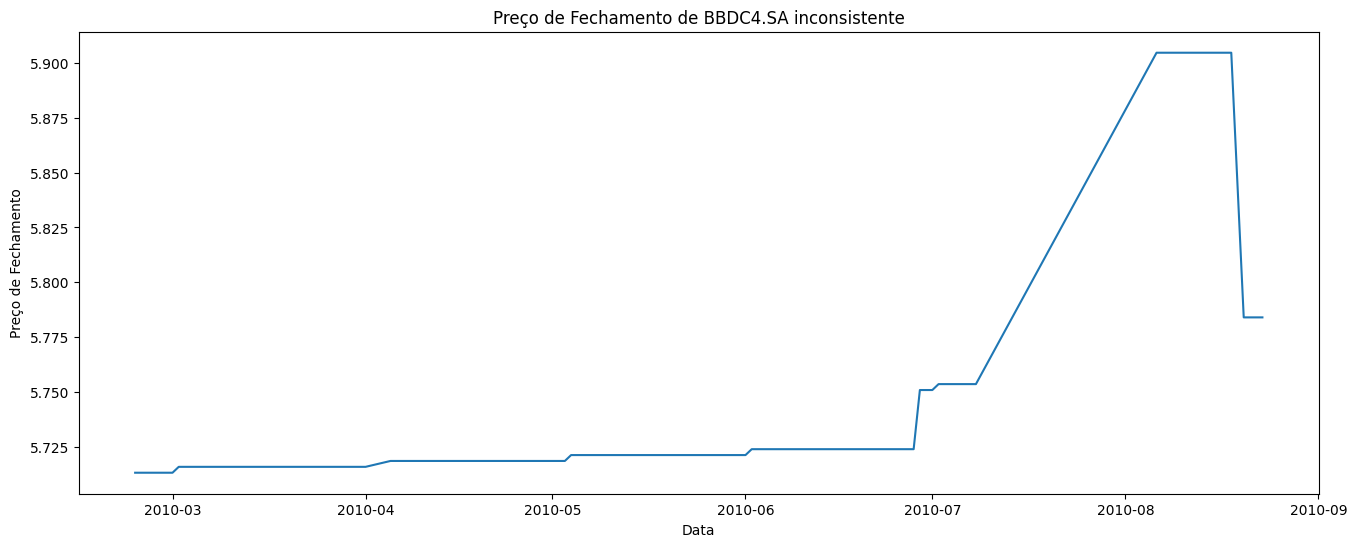

In [16]:
# índice dos valores repetidos
index_2y = np.where(np.isin(fechamento_1y,encontrar_valores_repetidos(fechamento_1y)))

# data dos valores repetidos
data_2y = data_1y[index_2y]

# valores repetidos
fechamento_2y = fechamento_1y[index_2y]

# gráfico
plt.figure(figsize=(16, 6))
sns.lineplot(x=data_2y, y=fechamento_2y)
plt.title('Preço de Fechamento de BBDC4.SA inconsistente')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();

In [17]:
# excluindo valores incosistentes

data_droping_index = np.isin(data, data_2y)
data_droping_index

data = np.delete(data, data_droping_index)
fechamento = np.delete(fechamento, data_droping_index)

index_clean = np.where((data >= pd.Timestamp('2010-02-01')) & (data <= pd.Timestamp('2010-08-31')))
data_clean = data[index_clean]
fechamento_clean = fechamento[index_clean]

# verificando se valores repetidos foram excluídos
pd.Series(fechamento_clean).value_counts()


,count
5.86458,1
5.746871,1
5.976293,1
5.974438,1
5.985574,1
6.022696,1
5.923267,1
5.882421,1
5.895412,1
5.941837,1


In [18]:
# excluindo valores nulo de Volume

index_volume_zero = np.where(array_bbdc4[:,-1] == 0)
array_bbdc4 = np.delete(array_bbdc4, index_volume_zero, axis=0)
array_bbdc4

array([[Timestamp('2008-01-04 00:00:00'), 10.777597427368164,
        11.10323657276564, 10.68305740348072, 11.008696548878197,
        5694095],
       [Timestamp('2008-02-18 00:00:00'), 10.296889305114746,
        10.359932244118356, 10.191819025761319, 10.217035815666986,
        3344189],
       [Timestamp('2008-02-26 00:00:00'), 11.189983367919922,
        11.221504344615228, 10.616299663587128, 10.696153125961608,
        13730398],
       ...,
       [Timestamp('2022-12-27 00:00:00'), 12.429659843444824,
        12.657804098035339, 12.302913124876314, 12.624004919361337,
        78235200],
       [Timestamp('2022-12-28 00:00:00'), 12.809897422790527,
        12.869045768394102, 12.412756573851075, 12.463455731393976,
        45117800],
       [Timestamp('2022-12-29 00:00:00'), 12.8014497756958,
        13.080293178710773, 12.78455059064067, 12.885948118479213,
        41911700]], dtype=object)

In [19]:
data = array_bbdc4[:, 0]
fechamento = array_bbdc4[:, 1]
volume = array_bbdc4[:, -1]

In [20]:
# Assuming 'data' and 'fechamento' arrays are already defined from the previous code

df = pd.DataFrame({'data': data, 'fechamento': fechamento, 'volume': volume})
df['fechamento'] = df['fechamento'].astype(float)
df['data'] = pd.to_datetime(df['data'])
df['volume'] = df['volume'].astype(int)
df.set_index('data', inplace=True)
df


,fechamento,volume
data,,
2008-01-04,10.777597,5694095
2008-02-18,10.296889,3344189
2008-02-26,11.189983,13730398
2008-04-24,11.395208,5235004
2008-05-07,12.144952,11040003
...,...,...
2022-12-23,12.793000,21104200
2022-12-26,12.488808,13937200
2022-12-27,12.429660,78235200


In [21]:
df['variacao_diaria'] = df['fechamento'].pct_change()
df

,fechamento,volume,variacao_diaria
data,,,
2008-01-04,10.777597,5694095,NaN
2008-02-18,10.296889,3344189,-0.044603
2008-02-26,11.189983,13730398,0.086734
2008-04-24,11.395208,5235004,0.018340
2008-05-07,12.144952,11040003,0.065795
...,...,...,...
2022-12-23,12.793000,21104200,0.017473
2022-12-26,12.488808,13937200,-0.023778
2022-12-27,12.429660,78235200,-0.004736


In [22]:
df_sumarizado = df.groupby([df.index.year.rename('ano'), df.index.month.rename('mes')]).describe()['variacao_diaria'].sort_index(level=['ano', 'mes'], ascending=[True, True])
df_sumarizado

count      mean       std       min       25%       50%       75%  \
ano  mes                                                                      
2008 1      0.0       NaN       NaN       NaN       NaN       NaN       NaN   
     2      2.0  0.021066  0.092869 -0.044603 -0.011768  0.021066  0.053900   
     4      1.0  0.018340       NaN  0.018340  0.018340  0.018340  0.018340   
     5      3.0  0.029687  0.031690  0.006493  0.011634  0.016774  0.041284   
     6      8.0 -0.016733  0.037542 -0.088482 -0.028966 -0.015777  0.004199   
...         ...       ...       ...       ...       ...       ...       ...   
2022 8     23.0  0.003774  0.011354 -0.025193 -0.003332  0.006079  0.013426   
     9     21.0  0.002298  0.013660 -0.019512 -0.006079  0.000509  0.009804   
     10    20.0  0.000391  0.025064 -0.043589 -0.014601  0.001992  0.011009   
     11    20.0 -0.011124  0.041062 -0.173843 -0.012305 -0.002587  0.004769   
     12    21.0 -0.001063  0.021032 -0.037085 -0.012134 -0.001445  0.017473   

               max  
ano  mes            
2008 1         NaN  
     2    0.086734  
     4    0.018340  
     5    0.065795  
     6    0.029649  
...            ...  
2022 8    0.018384  
     9    0.032258  
     10   0.069052  
     11   0.021696  
     12   0.035916  

[174 rows x 8 columns]

explicar resultado

In [23]:
df_sumarizado.drop(columns=['count','25%','75%'], inplace=True)
df_sumarizado

mean       std       min       50%       max
ano  mes                                                  
2008 1         NaN       NaN       NaN       NaN       NaN
     2    0.021066  0.092869 -0.044603  0.021066  0.086734
     4    0.018340       NaN  0.018340  0.018340  0.018340
     5    0.029687  0.031690  0.006493  0.016774  0.065795
     6   -0.016733  0.037542 -0.088482 -0.015777  0.029649
...            ...       ...       ...       ...       ...
2022 8    0.003774  0.011354 -0.025193  0.006079  0.018384
     9    0.002298  0.013660 -0.019512  0.000509  0.032258
     10   0.000391  0.025064 -0.043589  0.001992  0.069052
     11  -0.011124  0.041062 -0.173843 -0.002587  0.021696
     12  -0.001063  0.021032 -0.037085 -0.001445  0.035916

[174 rows x 5 columns]

In [24]:
df_sumarizado.isna().sum()

,0
mean,1
std,7
min,1
50%,1
max,1


In [25]:
df_sumarizado.dropna(inplace=True)
df_sumarizado

mean       std       min       50%       max
ano  mes                                                  
2008 2    0.021066  0.092869 -0.044603  0.021066  0.086734
     5    0.029687  0.031690  0.006493  0.016774  0.065795
     6   -0.016733  0.037542 -0.088482 -0.015777  0.029649
     7   -0.003079  0.025884 -0.021382 -0.003079  0.015224
     8   -0.050903  0.096543 -0.119170 -0.050903  0.017363
...            ...       ...       ...       ...       ...
2022 8    0.003774  0.011354 -0.025193  0.006079  0.018384
     9    0.002298  0.013660 -0.019512  0.000509  0.032258
     10   0.000391  0.025064 -0.043589  0.001992  0.069052
     11  -0.011124  0.041062 -0.173843 -0.002587  0.021696
     12  -0.001063  0.021032 -0.037085 -0.001445  0.035916

[167 rows x 5 columns]

In [26]:
df_sumarizado.rename(columns={'mean':'média', 'std': 'desvio padrão', '50%':'mediana'}, inplace=True)
df_sumarizado

média  desvio padrão       min   mediana       max
ano  mes                                                       
2008 2    0.021066       0.092869 -0.044603  0.021066  0.086734
     5    0.029687       0.031690  0.006493  0.016774  0.065795
     6   -0.016733       0.037542 -0.088482 -0.015777  0.029649
     7   -0.003079       0.025884 -0.021382 -0.003079  0.015224
     8   -0.050903       0.096543 -0.119170 -0.050903  0.017363
...            ...            ...       ...       ...       ...
2022 8    0.003774       0.011354 -0.025193  0.006079  0.018384
     9    0.002298       0.013660 -0.019512  0.000509  0.032258
     10   0.000391       0.025064 -0.043589  0.001992  0.069052
     11  -0.011124       0.041062 -0.173843 -0.002587  0.021696
     12  -0.001063       0.021032 -0.037085 -0.001445  0.035916

[167 rows x 5 columns]

### Gráficos

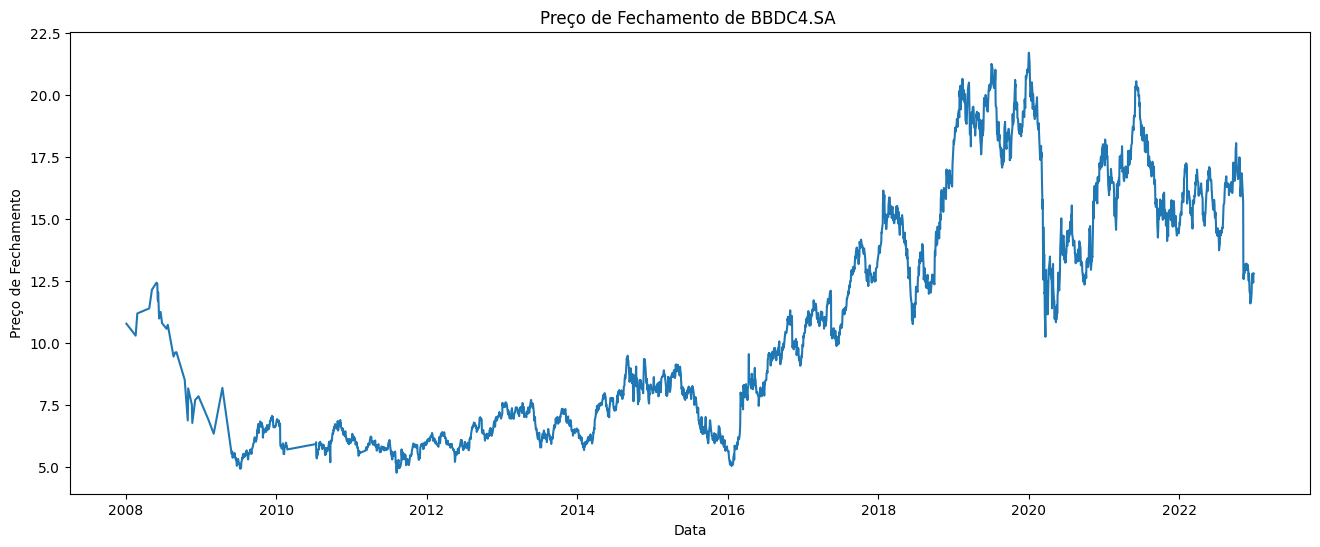

In [27]:
# Preços

# gráfico
plt.figure(figsize=(16, 6))
sns.lineplot(x=df.index, y=df['fechamento'])
plt.title('Preço de Fechamento de BBDC4.SA ')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();

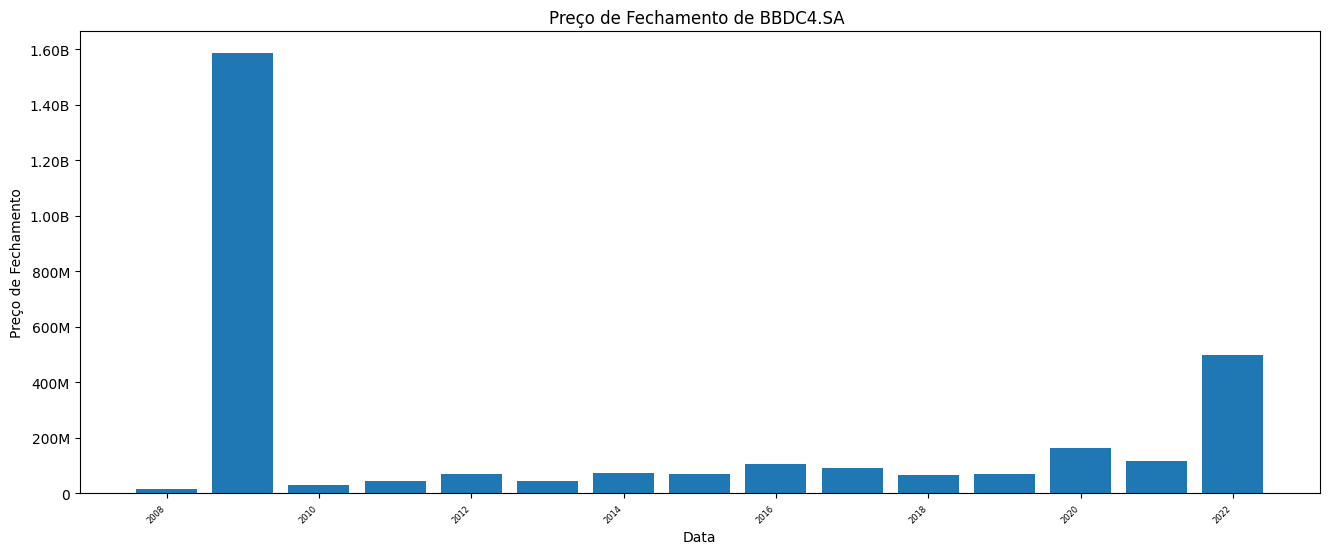

In [38]:
# import matplotlib.dates as mdates
# gráfico barra
plt.figure(figsize=(16, 6))
# sns.barplot(x=df.index.year, y=df['volume'])
plt.bar(df.index.year, df['volume'])
formatter_eng = EngFormatter()

import matplotlib.ticker as ticker

# ... (seu código anterior) ...

def formatar_eixo_y(x, pos):
    """Formata os valores do eixo y em milhões (M) e bilhões (B)."""
    if x >= 1e9:
        return f'{x/1e9:.2f}B'  # Formata em bilhões
    elif x >= 1e6:
        return f'{x/1e6:.0f}M'  # Formata em milhões
    else:
        return f'{x:.0f}'      # Formata em unidades normais


# Aplica a função de formatação ao eixo y
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_eixo_y))
# plt.gca().yaxis.set_major_formatter(formatter_eng)
# plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_eixo_y))
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.title('Preço de Fechamento de BBDC4.SA ')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();

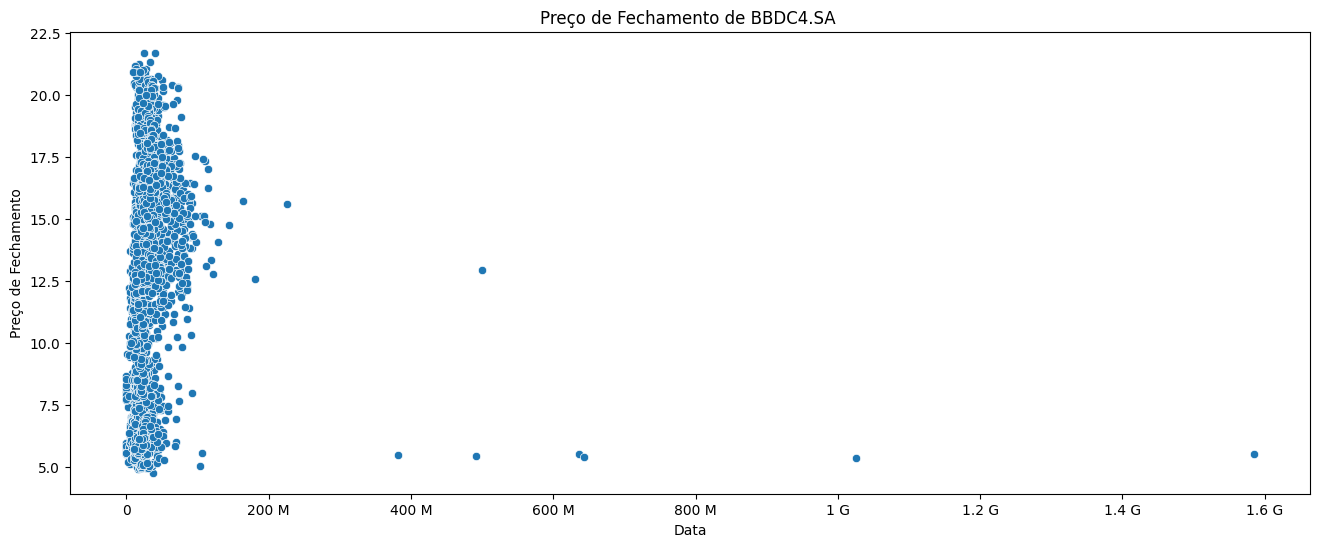

In [29]:
# gráfico barra
plt.figure(figsize=(16, 6))
sns.scatterplot(y=df['fechamento'], x=df['volume'])
formatter_eng = EngFormatter()
plt.gca().xaxis.set_major_formatter(formatter_eng)
plt.title('Preço de Fechamento de BBDC4.SA ')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.show();